**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [45]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

import Daddy_functions as dd #See py-file code for details on functions
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [46]:
#Note that our solver includes default values for all parameters, so we can simply call the function only with our starting value
Lopt = dd.optimal_labor_supply()
for i in [1,2]: 
    result, G =  dd.solve_Q1(x0=12, G=i)
    print('\n','Solution from SLQSP Optimizer = ', result.x[0],' and analytical solution = ', Lopt, ' for G = ', i, '--> Difference ', result.x[0]-Lopt, '\n')


 Solution from SLQSP Optimizer =  15.296097648253348  and analytical solution =  15.30165022719559  for G =  1 --> Difference  -0.005552578942243258 


 Solution from SLQSP Optimizer =  15.296100817616713  and analytical solution =  15.30165022719559  for G =  2 --> Difference  -0.005549409578877729 



We see that the difference is of very small magnitude, although assert statements or np.isclose did not judge the values being close enough to be considered equal. Nevertheless, we consider the difference to be negligable and conclude that G does not affect optimal labor supply, all else equal. Although the result seems counter-intuitive at first, we note that G does not appear in the given solution either. 

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

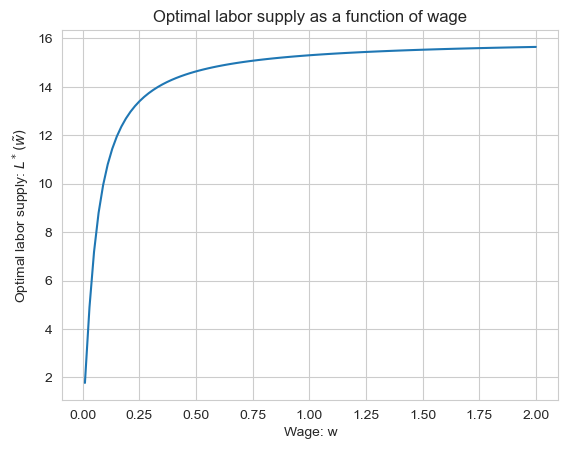

In [47]:
#Define range of wages and initialize Ls

w_range = np.linspace(0.01,2,100) #We tried higher values of max w without gaining much insight
Ls = np.empty(len(w_range))

#Loop over wage range and calculate optimal labor supply for each wage
for i, w in enumerate(w_range): 
    Ls[i] = dd.optimal_labor_supply(w=w)

#Plot optimal labor supply as a function of wage
plt.plot(w_range, Ls)
plt.xlabel('Wage: w')
plt.ylabel('Optimal labor supply: $L^*(\\tilde{w})$')
plt.title('Optimal labor supply as a function of wage')
plt.grid(True)
plt.show()


For small increases in wage, optimal labor supply jumps drastically. The motivation to work for higher wages flattens after roughly L = 12. 


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


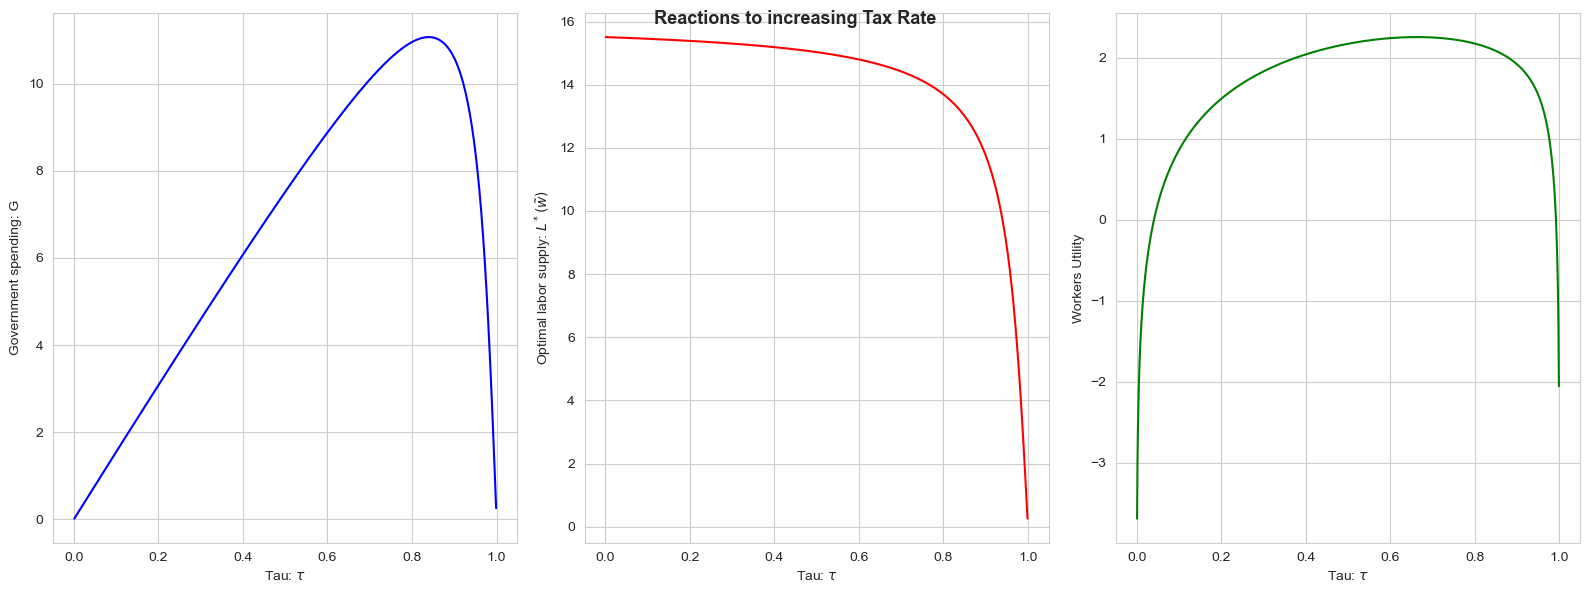

In [48]:
# Initialize grid
tau_values = np.linspace(0.001, 0.999, 1000)  # Note that the denominator in optimal labor supply is zero when tau = 1, why exclude this value
Ls_values = []
G_values = []
util_values = []

for tau in tau_values:
    Ls, G, util = dd.analytical_Ls_and_G(tau=tau)
    Ls_values.append(Ls)
    G_values.append(G)
    util_values.append(util)

# Set style
sns.set_style('whitegrid')

# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Plot G_values
axes[0].plot(tau_values, G_values, color='blue')
axes[0].set_xlabel('Tau: $\\tau$')
axes[0].set_ylabel('Government spending: G')


# Plot Ls
axes[1].plot(tau_values, Ls_values, color='red')
axes[1].set_xlabel('Tau: $\\tau$')
axes[1].set_ylabel('Optimal labor supply: $L^*(\\tilde{w})$')


# Plot util_values
axes[2].plot(tau_values, util_values, color='green')
axes[2].set_xlabel('Tau: $\\tau$')
axes[2].set_ylabel('Workers Utility')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
fig.suptitle('Reactions to increasing Tax Rate', fontsize=13, fontweight='bold')
plt.show()


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

The optimal tax rate is:  0.663194614765352  and the utility is:  2.2568852769165972


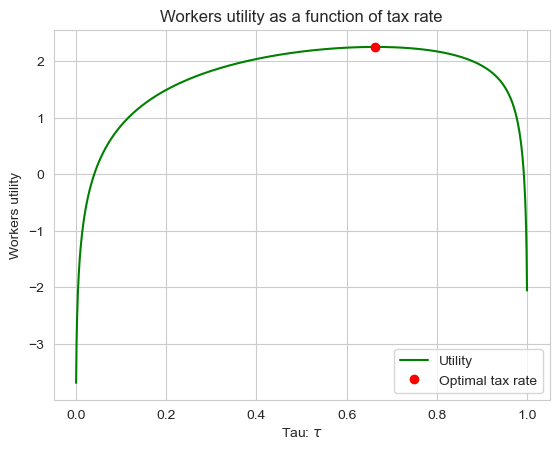

In [49]:
# Find optimal tax rate
result = optimize.minimize(dd.objective_function_tau, x0=0.1, method='SLSQP', bounds=[(0.001, .999)], options={'disp': False})
print('The optimal tax rate is: ', result.x[0], ' and the utility is: ', -result.fun)

# Plot optimal tax rate and utility function
plt.plot(tau_values, util_values, label='Utility', color='green')
plt.plot(result.x[0], -result.fun, 'o', label='Optimal tax rate', color='red')
plt.xlabel('Tau: $\\tau$')
plt.ylabel('Workers utility')
plt.title('Workers utility as a function of tax rate')
plt.grid(True)
plt.legend()
plt.show()
tau_star = result.x[0] #Save optimal tax rate for later use


A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [50]:
# Set 1
Ls, Gs, util = dd.two_step(sigma=1.001, rho=1.001, tau=tau_star, G=0.5, eps=1)
Ls = float(Ls)  # Convert to float
Gs = float(Gs)  # Convert to float
util = float(util)  # Convert to float
print('The optimal labor supply is:', round(Ls, 2), 'and the optimal government spending is:', round(Gs, 2), 'and the utility is:', round(util, 2), '\n')

# Set 2
Ls, Gs, util = dd.two_step(sigma=1.5, rho=1.5, tau=tau_star, G=0.5, eps=1)
Ls = float(Ls)  # Convert to float
Gs = float(Gs)  # Convert to float
util = float(util)  # Convert to float
print('The optimal labor supply is:', round(Ls, 2), 'and the optimal government spending is:', round(Gs, 2), 'and the utility is:', round(util, 2), '\n')


The optimal labor supply is: 14.57 and the optimal government spending is: 9.66 and the utility is: 1.81 

The optimal labor supply is: 8.0 and the optimal government spending is: 5.3 and the utility is: 1.13 



Our results seem reasonable when we plot workers utility whilst increasing sigma, holding rho fixed and vice versa. 

We use the most recent optimal solution for G, L and Tau to visualize the behavior of varying the newly introduced parameters on workers utility. 
We see that utility increases with sigma and decreases with rho. The effect of rho on utility is stronger (steeper slope) than sigma. From above we see this dominating effect as workers utility drops from set 1 to set 2 when both sigma and rho are increased. 

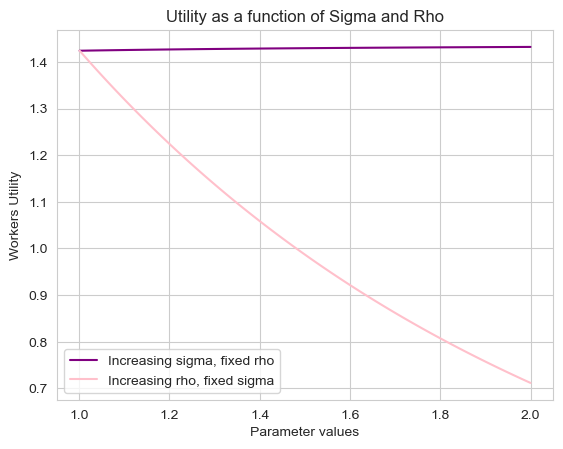

In [51]:
grid = np.linspace(1.001, 2, 100)
util_values_fixed_rho= []
util_values_fixed_sigma= []

for i in grid: 
    util_values_fixed_rho.append(dd.util_plot(sigma=i, rho=1.001,L=Ls, G=Gs, tau=tau_star))
    util_values_fixed_sigma.append(dd.util_plot(sigma=1.001, rho=i, L=Ls, G=Gs, tau=tau_star))

plt.plot(grid, util_values_fixed_rho, label='Increasing sigma, fixed rho', color='purple')
plt.plot(grid, util_values_fixed_sigma, label='Increasing rho, fixed sigma', color='pink')
plt.xlabel('Parameter values')
plt.ylabel('Workers Utility')
plt.title('Utility as a function of Sigma and Rho')
plt.legend()
plt.show()

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [52]:
#We create a loop for the two sets of parameters and use the two step function to get the optimal tau and utility for each set of parameters.

opt_tau_values = []
max_util_values = []

#Loop over the two sets of parameters
for i, val in enumerate([1.001, 1.5]):
    max_util = -np.inf
    opt_tau = None
    tau_values = np.linspace(0.001, 0.999, 1000)
    util_values = []
    #Loop over tau values
    for t in tau_values:
        Ls, Gs, util = dd.two_step(sigma=val, rho=val, eps=1.0, tau=t, G=1)
        util_values.append(util)
        if util > max_util:
            max_util = util
            opt_tau = t

    # Create variable names 
    opt_tau_name = f"opt_tau_{i}"
    max_util_name = f"max_util_{i}"

    # Assign values 
    globals()[opt_tau_name] = opt_tau
    globals()[max_util_name] = max_util

    # Append values to the result lists
    opt_tau_values.append(opt_tau)
    max_util_values.append(max_util)

# Convert NumPy arrays to floats
opt_tau_0 = float(opt_tau_values[0])
max_util_0 = float(max_util_values[0])
opt_tau_1 = float(opt_tau_values[1])
max_util_1 = float(max_util_values[1])

# Print results
print(f"Optimal tau for sigma = rho = 1.001 is: {opt_tau_0:.3f} and the utility is: {max_util_0:.3f}", "\n")
print(f"Optimal tau for sigma = rho = 1.5 is: {opt_tau_1:.3f} and the utility is: {max_util_1:.3f}", "\n")


Optimal tau for sigma = rho = 1.001 is: 0.511 and the utility is: 1.857 

Optimal tau for sigma = rho = 1.5 is: 0.615 and the utility is: 1.106 



## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [53]:
for k in [1.0, 2.0]:
    analytical_l = dd.analytical_profit(k=k)
    numerical_l, numerical_profit = dd.profit_maximization(k=k)
    print(f"With k = {k} --> Analytical labor demanded {analytical_l:.2f}\nThe numerical optimum is {numerical_l:.2f} with profit {numerical_profit:.2f}", "\n")

With k = 1.0 --> Analytical labor demanded 0.25
The numerical optimum is 0.25 with profit 0.25 

With k = 2.0 --> Analytical labor demanded 1.00
The numerical optimum is 1.00 with profit 1.00 



We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [54]:
print('With K = 10k and the baseline parameters we get a H value of: ', round(dd.ex_ante_value(),2), '\n')

With K = 10k and the baseline parameters we get a H value of:  27.48 



Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [55]:
print('With K = 10k we get a H value of: ', round(dd.ex_ante_value(extension=True, Delta=0.05),2), '\n', 'We conclude that profitability is slightly increased')

With K = 10k we get a H value of:  28.18 
 We conclude that profitability is slightly increased


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

The optimal delta is: 0.083 and the H value is: 28.242 



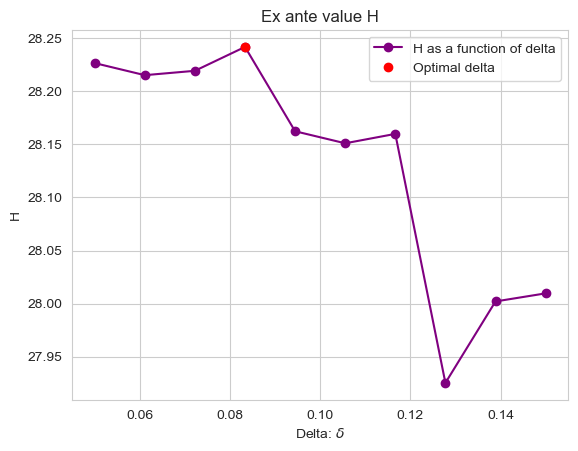

In [56]:
#Note that this will take up to 2 minutes to run

#Define grid 
delta_grid = np.linspace(0.05, 0.15, 10) 

#From exploring, we know that with deltas over and under the thresholds, H value decreases rapidily

#Initialize empty lists
max_H_policy = -np.inf
opt_delta = None
H_values = []

#Loop over delta values
for d in delta_grid:
    H = dd.ex_ante_value(extension=True, Delta=d)
    H_values.append(H)
    if H > max_H_policy:
        max_H_policy = H
        opt_delta = d

#Plot and print results
print(f"The optimal delta is: {opt_delta:.3f} and the H value is: {max_H_policy:.3f}", "\n")
plt.plot(delta_grid, H_values, label='H as a function of delta', color='purple', marker='o')
plt.plot(opt_delta, max_H_policy, 'o', label='Optimal delta', color='red')
plt.xlabel('Delta: $\\delta$')
plt.ylabel('H')
plt.title('Ex ante value H')
plt.grid(True)
plt.legend()
plt.show()




**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



A wild west liberal policy would be to abolish all labor laws. 
Firing a worker would not imply any burden to the salon.

In parallel, Linkedin and ChatGPT become super convenient in hiring and training new workers. 

As of consequence, iota decreases to almost zero, 0.00001. 
We argue that this reduction in friction, should increase profitability. 
We find that it does increase the ex ante value of the salon slightly, through higher profits. 

In [57]:
print('With iota = 0.00001 get a H value of: ', round(dd.ex_ante_value(extension=False, iota=0.00001),2), '\n')

With iota = 0.00001 get a H value of:  28.58 



## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [58]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [59]:
seed = 1969
np.random.seed(seed) 
bound = 600
K_max = 1000
N = 2 #Number of dimensions of the griewank function
x0s = np.random.uniform(low=-bound, high= bound, size=(K_max,N))

In [60]:
xopt, fopt, xs, fs, xk0v, k = dd.refined_global_optimizer(x0s = x0s, K_bar=10)

   0: x0 = ( 118.80,   93.22) -> converged at ( 116.18,   93.21) with f =   5.55025276
  13: x0 = (  52.54,   98.73) -> converged at (  84.78,   93.21) with f =   3.97190730
  40: x0 = (-388.80,  -30.08) -> converged at (-116.18,   39.95) with f =   3.77550250
  42: x0 = ( 502.09, -343.37) -> converged at (  -9.42,   39.95) with f =   0.42151514
  71: x0 = (  80.67,  -57.99) -> converged at (  21.98,    4.44) with f =   0.12577210
  92: x0 = ( -62.94,  -88.26) -> converged at (  -3.14,  -22.19) with f =   0.12571297
 140: x0 = ( 157.09,   21.11) -> converged at (   9.42,    4.44) with f =   0.02712538
 220: x0 = (-120.02,    9.18) -> converged at (  -3.14,    4.44) with f =   0.00739604
 289: x0 = (  45.27,  -29.40) -> converged at (  -0.00,   -0.00) with f =   0.00000000
Optimal solution found at iteration 289


In [61]:
print('Minimum function value is: ', fopt, '\n','with the values: ', xopt[0],xopt[1], '\n', 'and k = ',k )

Minimum function value is:  0.0 
 with the values:  -5.400498023845343e-09 -9.349404887192695e-09 
 and k =  289


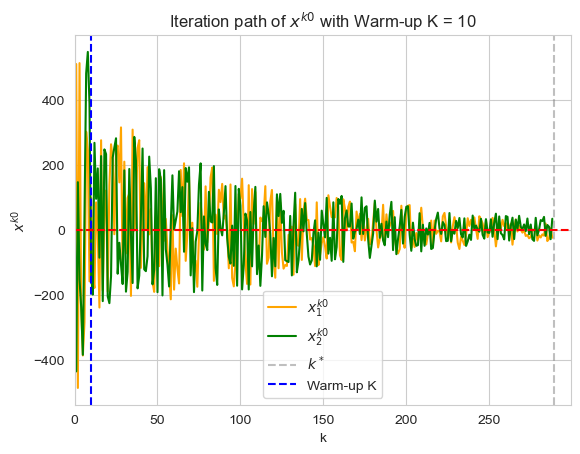

In [62]:
dd.print_path(xk0v,fs, K_bar=10)

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

   0: x0 = ( 118.80,   93.22) -> converged at ( 116.18,   93.21) with f =   5.55025276
  13: x0 = (  52.54,   98.73) -> converged at (  50.24,   97.65) with f =   3.01739550
  71: x0 = (  80.67,  -57.99) -> converged at (  78.50,  -57.70) with f =   2.37450258
 125: x0 = (-276.31,  161.07) -> converged at ( -78.50,   39.95) with f =   1.94067424
 138: x0 = ( 272.91,   60.43) -> converged at (  65.94,   48.82) with f =   1.68409421
 144: x0 = (-272.04,  -68.59) -> converged at ( -65.94,    4.44) with f =   1.09250992
 170: x0 = ( 290.82,   -4.79) -> converged at (  50.24,   -0.00) with f =   0.63133900
 182: x0 = ( -46.51,  143.69) -> converged at (  18.84,   44.38) with f =   0.58176922
 189: x0 = ( -68.43, -181.11) -> converged at (  -6.28,  -17.75) with f =   0.08874263
 242: x0 = (  67.00,  108.14) -> converged at (   9.42,    4.44) with f =   0.02712538
 270: x0 = ( -75.13,  -27.03) -> converged at (  -6.28,   -0.00) with f =   0.00986467
 289: x0 = (  45.27,  -29.40) -> converged 

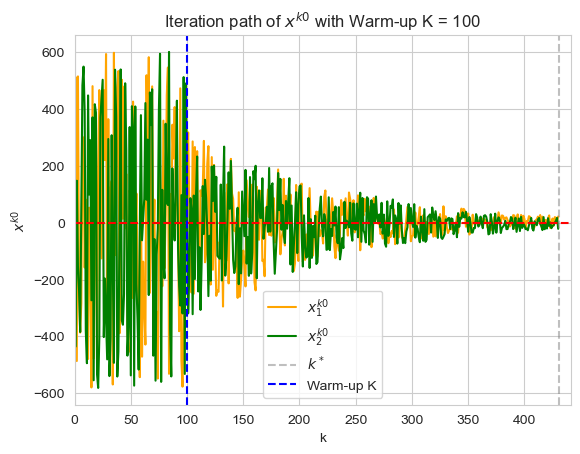

Minimum function value is:  0.0 
 with the values:  -8.614905580010741e-09 -1.4209138582533452e-08 
 and k =  431


In [63]:
xopt, fopt, xs, fs, xk0v, k = dd.refined_global_optimizer(x0s = x0s, K_bar=100)
dd.print_path(xk0v,fs, K_bar=100)
print('Minimum function value is: ', fopt, '\n','with the values: ', xopt[0],xopt[1], '\n', 'and k = ',k )

Ultimately, it is a trade off between how much we want to 'randomly' explore during the warm up iterations and how much we want to refine our starting values. 

In our case know from the visualizations shown in the lecture notes (Unconstrained Optimization) that there are many local minima when the x-values get small. 

Therefore, it makes sense to target our starting values more by letting the subsequent starting value depend on the last minimum value found through the weighted Chi-function.

Bluntly put, we need less warm up and can get right to work. Below, we show this tendency by putting K bar to one. We get even faster convergence to a minimum below our tolerence level. With only one warm up iteration, we break our loop when k = 269 wheras k = 289 with K bar equal to 10. 

The finding may indeed be a lucky punch as it depends on the seed, too. Having some warm up values is reasonable, but given the grouping of local minima, we argue that we should lean towards a lower K bar. 
Conversly, one could be lucky when increasing the K-Bar to 100 and break the loop quicker. Due to the emphazised random element when warming up, no guarantee can be given in terms of speed of convergence.  Nevertheless, we argue for the tendency for a lower K-bar reaching faster convergence. 

In sum, we have argued that is is not a better idea as phrased in the question. 

   0: x0 = ( 118.80,   93.22) -> converged at ( 116.18,   93.21) with f =   5.55025276
   4: x0 = (-237.66, -237.42) -> converged at ( -56.52,  -71.02) with f =   2.06108496
  13: x0 = (  52.54,   98.73) -> converged at (  -6.28,    8.88) with f =   0.02958416
 180: x0 = ( 109.29,  -92.70) -> converged at (   9.42,   -4.44) with f =   0.02712538
 220: x0 = (-120.02,    9.18) -> converged at (  -3.14,   -4.44) with f =   0.00739604
 267: x0 = ( -27.03,  -17.82) -> converged at (  -3.14,   -4.44) with f =   0.00739604
 269: x0 = (  66.93,   81.75) -> converged at (  -0.00,   -0.00) with f =   0.00000000
Optimal solution found at iteration 269


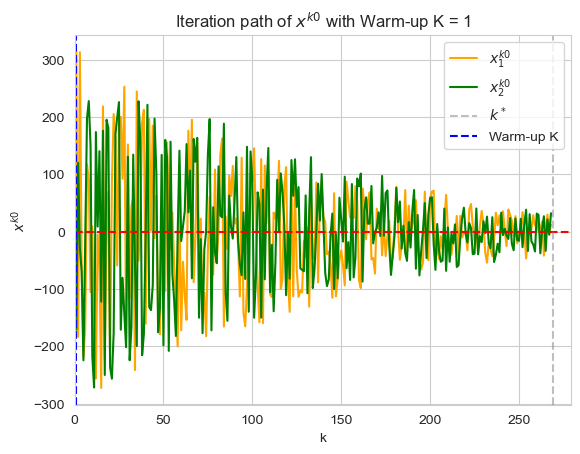

Minimum function value is:  1.1102230246251565e-16 
 with the values:  -1.2038432585895784e-08 -6.7934737580657104e-09 
 and k =  269


In [64]:
val = 1 #K_bar value
xopt, fopt, xs, fs, xk0v, k = dd.refined_global_optimizer(x0s= x0s, K_bar=val)
dd.print_path(xk0v,fs, K_bar=val)
print('Minimum function value is: ', fopt, '\n','with the values: ', xopt[0],xopt[1], '\n', 'and k = ',k )